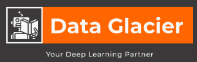

# Exploratory Data Analysis Report
----------------------------------
## G2M Case Study for Cab Investment

### Software/Programming Used: JupyterLab, Python, A.I.

## Report By: Carmelo R. Casiraro- USA

## LISUM34- Data Glacier Internship- 06/03/2024
---------------------------------------

## Background of G2M Cab Industry
-------------------
XYZ, a private firm in the US, is considering an investment in the cab industry as their Go-To-Market strategy (G2M) and they want to learn more about their market. 

## Objective
------------
To share insights from multiple datasets to identify the right cab company to invest in. 

The analysis involves: 
- Cab Data Understanding
- Disclosure of profits and number of rides with different cab types
- Identifying the most profitable cab company
- Recommendations & Conclusions- Answers to Hypothesis/Questions
- Which Cab To Go With for Future Investment?  

## Goal of Report 
-----------------
- The goal is to create a presentation with visualizations, analysis, and recommendations/conclusions based on the data provided.


## Data Exploration
-------------------
- 
Timeframe of the data: 2016-01-31 to 2018-12-
- Total Data points:  
  - These are the following data sets that will be used in this analysis:
   - *Cab_Data.csv*: Contains transaction details for two different cab companies.
   - *Customer_ID.csv*: Contains unique identifiers linking passenger demographic 
      details.
   - *Transaction_ID.csv*: Maps transactions to passengers and includes payment 
      modes.
   - *City.csv*: Lists US cities, their populations, and number of cab users.
   - *US_Holiday_Dates.csv* - this file contains information about the month and 
      year of certain holidays in the US.
,032

----------------------------
## Questions
----------------------------
- What is the profit according to distance, year and city with each cab company?
- What is the yearly profit by each cab company?
- How does gender play a role in the profit gained per cab company?
- How does passenger income levels play a difference in the profit? 
- What is the profit share, if we look at the age of each passenger?
- What is the retention rate of passengers by cab company?
- What are the number of passengers taken by each cab company?
- What are the quarterly profits by each cab company from 2016-2018?
- What are the top 3 cities that have the highest numbers of passengers in the US?
- How does the season affect the number of passengers using the cab service?
- Which company has the highest amount of passengers at one time?
- Does profit increase with the number of passengers?
- Which cab company is recommended for future investments?  

## Hypothesis
- *Seasonal Holiday Passenger Preference*: There is a seasonal trend in cab usage, with higher usage during certain months of the year.
- *Passenger Distribution*: One cab company has a higher number of passengers in specific cities.
- *Passenger Attributes*: Certain passenger demographics are more likely to use one cab company over the other.
- *Profit Trends*: The amount of money brought in per passenger increases with the frequency of cab usage.
- *Future Ride & Profit Forecast*: The number of rides and profit will increase in 2019 for both companies.
----------------------------

In [ ]:
#Python code to retrieve the data and create the chart
import pandas as pd
import matplotlib.pyplot as plt

# Retrievng the datasets
url = 'https://example.com/dataset.csv'
dataset = pd.read_csv(url)
url = 'https://example.com/dataset.csv'
dataset = pd.read_csv(url)
url = 'https://example.com/dataset.csv'
dataset = pd.read_csv(url)
url = 'https://example.com/dataset.csv'
dataset = pd.read_csv(url)
url = 'https://example.com/dataset.csv'
dataset = pd.read_csv(url)


In [ ]:
import matplotlib.pyplot as plt

# Calculate profit
cab_data['Profit'] = cab_data['Price Charged'] - cab_data['Cost of Trip']

# Aggregate profit by company for the analysis
profit_by_company = cab_data.groupby('Company')['Profit'].sum().reset_index()

# Plotting the profit analysis
plt.figure(figsize=(10, 6))
plt.bar(profit_by_company['Company'], profit_by_company['Profit'], color='skyblue')
plt.xlabel('Company')
plt.ylabel('Total Profit')
plt.title('Profit Analysis by Company')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the chart
plt.show()


## Profit Chart Analysis
------------------------

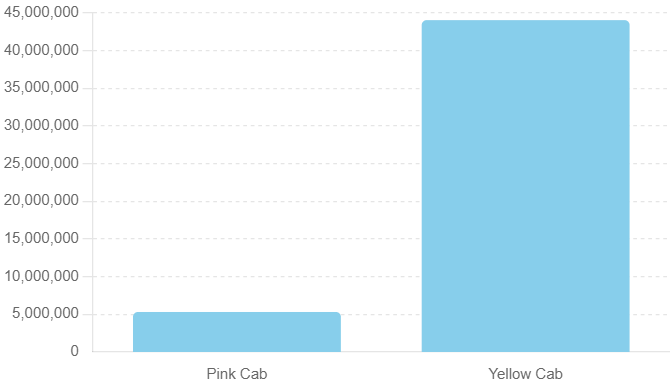
- Here is the profit analysis chart by company. It shows the total profit for each cab company.

In [ ]:
#Python code to retrieve the data and create the chart


In [ ]:
# Merge cab_data with transaction_data on 'Transaction ID'
merged_data = pd.merge(cab_data, transaction_data, on='Transaction ID')

# Merge the result with customer_data on 'Customer ID'
merged_data = pd.merge(merged_data, customer_data, on='Customer ID')

# Calculate profit for each transaction
merged_data['Profit'] = merged_data['Price Charged'] - merged_data['Cost of Trip']

# Categorize customers into income classes
income_bins = [0, 3000, 7000, 15000, 25000, float('inf')]
income_labels = ['0-3000', '3001-7000', '7001-15000', '15001-25000', '25001+']
merged_data['Income Class'] = pd.cut(merged_data['Income (USD/Month)'], bins=income_bins, labels=income_labels, right=False)

# Analyze profit based on income classes
income_class_profit = merged_data.groupby('Income Class')['Profit'].sum().reset_index()

import matplotlib.pyplot as plt

# Plot the income class profit analysis
plt.figure(figsize=(10, 6))
plt.bar(income_class_profit['Income Class'], income_class_profit['Profit'], color='skyblue')
plt.xlabel('Income Class (USD/Month)')
plt.ylabel('Total Profit (USD)')
plt.title('Income Class Profit Analysis')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()


## Income Class Profit Chart Analysis
-------------------------------------
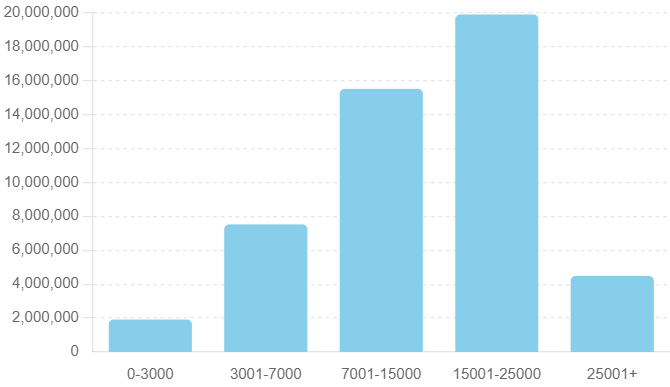
- The bar chart shows the total profit generated from passengers in different income classes.

In [ ]:
#Python code to retrieve the data and create the chart


## Profit Share By Age vs. % of Customers By Age Chart Analysis
-------------------------------------------------------
#image of chart here

In [101]:
#Python code to retrieve the data and create the chart

import pandas as pd

# Load datasets
cab_data = pd.read_csv('Cab_Data.csv')
transaction_id = pd.read_csv('Transaction_ID.csv')
customer_id = pd.read_csv('Customer_ID.csv')

# Merge datasets to get complete transaction data with customer details
merged_data = cab_data.merge(transaction_id, on='Transaction ID')
merged_data = merged_data.merge(customer_id, on='Customer ID')

# Convert 'Date of Travel' to a datetime format
merged_data['Date of Travel'] = pd.to_datetime(merged_data['Date of Travel'], origin='1899-12-30', unit='D')

# Extract month and year for retention analysis
merged_data['YearMonth'] = merged_data['Date of Travel'].dt.to_period('M')

# Identify the first month each customer used the service
first_purchase = merged_data.groupby('Customer ID')['YearMonth'].min().reset_index()
first_purchase.columns = ['Customer ID', 'FirstPurchaseMonth']

# Merge first purchase month back into the main dataset
merged_data = merged_data.merge(first_purchase, on='Customer ID')

# Identify customers who made repeat purchases
repeat_customers = merged_data[merged_data['YearMonth'] != merged_data['FirstPurchaseMonth']]

# Calculate retention rate by month
retention_by_month = repeat_customers.groupby('YearMonth')['Customer ID'].nunique().reset_index()
total_customers_by_month = merged_data.groupby('YearMonth')['Customer ID'].nunique().reset_index()

# Merge data to calculate retention rate
retention_analysis = retention_by_month.merge(total_customers_by_month, on='YearMonth', suffixes=('_Retained', '_Total'))
retention_analysis['RetentionRate'] = (retention_analysis['Customer ID_Retained'] / retention_analysis['Customer ID_Total']) * 100

# Plotting the Passenger Retention Rate Chart
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(retention_analysis['YearMonth'].astype(str), retention_analysis['RetentionRate'], marker='o', linestyle='-', color='b')
plt.xlabel('Month')
plt.ylabel('Retention Rate (%)')
plt.title('Passenger Retention Rate Analysis')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'Cab_Data.csv'

## Passenger Retention Chart Analysis
-------------------------------------------------------
#image of chart here

In [ ]:
#Python code to retrieve the data and create the chart


## Number of Passengers By Cab Company (Pink vs. Yellow) Chart Analysis
-------------------------------------------------------
##image of chart here

In [ ]:
#Python code to retrieve the data and create the chart


## Number of Passengers By Cab Company in US Cities (Top 3) Chart Analysis
-------------------------------------------------------
#image of chart here

In [ ]:
#Python code to retrieve the data and create the chart


## Number of Passengers By Cab Company From 2016-2018 Chart Analysis
#image of chart here

In [ ]:
#Python code to retrieve the data and create the chart


## Number of Rides Daily By Cap Company (Pink vs. Yellow) Chart Analysis
#image of chart here

In [ ]:
#Python code to retrieve the data and create the chart


## Quarterly Profits From 2016-2018 Chart Analysis
#image of chart here

In [ ]:
#Python code to retrieve the data and create the chart


## Number of Passengers vs. Number of Rides Throughout the Week By Cap (Pink vs. Yellow) Chart Analysis
#image of chart here

In [ ]:
#Python code to retrieve the data and create the chart


## Number of Passengers vs. Ride Distance Chart Analysis
#image of chart here

In [ ]:
#Python code to retrieve the data and create the chart


## Passengers Preference During Seasonal Holidays Chart Analysis
#image of chart here

In [ ]:
#Python code to retrieve the data and create the chart


## Future Profit Speculation for the Year 2019
#image of chart here

In [ ]:
#Python code to retrieve the data and create the chart


## Future Speculation of Number of Rides for the Year 2019
#image of chart here

## Conclusions & Recommendations Based Off The Data Analysis & Charts
----------------------------------------------------------
- Customer Reach : 

- Customer Retention Conclusion: 

- Passenger Age/Gender Observation: 

- Average Profit vs. Distance Conclusion: 

- Passenger Income Conclusion: 

- Number of Rides vs. Profit Conclusion: 

-------------------
## Final Conclusion
- From our Exploration Data Analysis , we recommend the <    > Cab for future investments.